# Setup Environment and Load Data
Import necessary libraries (pandas, pyarrow, matplotlib, etc.) and load the parquet file. Configure display settings for better visibility of nested data structures.

In [1]:
# Import necessary libraries
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

# Configure display settings for better visibility of nested data structures
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Load the parquet file
file_path = "./data/train-00000-of-00001.parquet"  # Replace with the actual path to your parquet file
data = pd.read_parquet(file_path)

# Display the first few rows of the data
# data.head()


# Examine Parquet File Structure
Explore the schema of the parquet file, checking the structure of the 'messages' column which contains nested list data. Analyze the shape, data types, and basic statistics.

In [2]:
# Examine the structure of the parquet file
# Display the schema of the parquet file
parquet_file = pq.ParquetFile(file_path)
print(parquet_file.schema)

# Check the structure of the 'messages' column
messages_sample = data['messages'].head()
print("Sample data from 'messages' column:")
print(messages_sample)

# Analyze the shape of the data
print(f"Shape of the dataset: {data.shape}")

# Check data types of all columns
print("Data types of columns:")
print(data.dtypes)

# Generate basic statistics for the 'messages' column
print("Basic statistics for 'messages' column:")
print(data['messages'].apply(lambda x: len(x) if isinstance(x, list) else 0).describe())

required group field_id=-1 schema {
  optional group field_id=-1 messages (List) {
    repeated group field_id=-1 list {
      optional group field_id=-1 element {
        optional binary field_id=-1 content (String);
        optional binary field_id=-1 role (String);
      }
    }
  }
}

Sample data from 'messages' column:
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

# Explore Message Content
Extract and inspect the message content from the nested list structure. Analyze message roles (system, user, assistant) distribution and content lengths.

Extracted 'messages' DataFrame:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

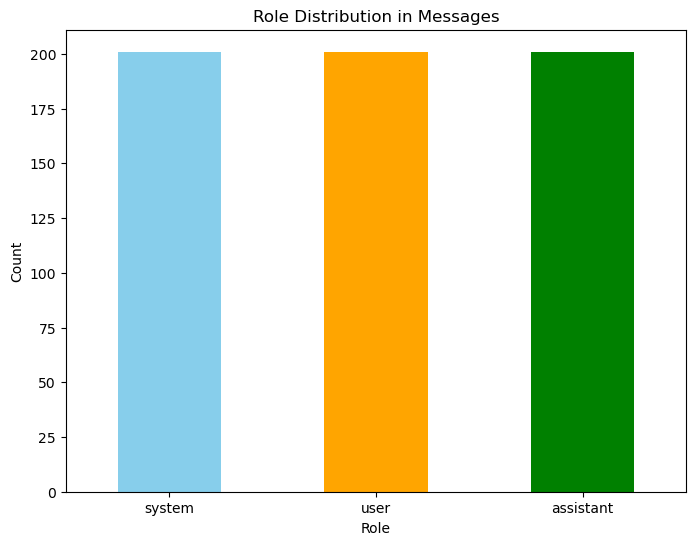

Statistics for message content lengths:
count     603.000000
mean     3235.349917
std      2634.863919
min       428.000000
25%       428.000000
50%      2602.000000
75%      5817.500000
max      9815.000000
Name: content_length, dtype: float64


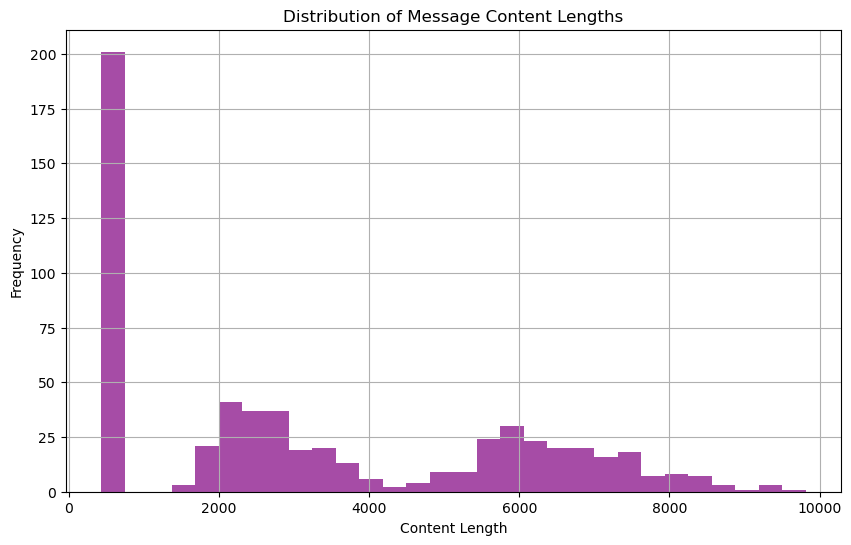

In [3]:
# Extract the 'messages' column into a DataFrame for easier manipulation
messages_df = pd.DataFrame(data['messages'].explode().tolist())

# Display the first few rows of the extracted DataFrame
print("Extracted 'messages' DataFrame:")
print(messages_df.head())

# Analyze the distribution of roles (system, user, assistant)
role_distribution = messages_df['role'].value_counts()
print("Role distribution:")
print(role_distribution)

# Plot the role distribution
plt.figure(figsize=(8, 6))
role_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title("Role Distribution in Messages")
plt.xlabel("Role")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Analyze the length of message content
messages_df['content_length'] = messages_df['content'].apply(len)

# Display basic statistics for content lengths
print("Statistics for message content lengths:")
print(messages_df['content_length'].describe())

# Plot the distribution of content lengths
plt.figure(figsize=(10, 6))
messages_df['content_length'].hist(bins=30, color='purple', alpha=0.7)
plt.title("Distribution of Message Content Lengths")
plt.xlabel("Content Length")
plt.ylabel("Frequency")
plt.show()

# Extract Vulnerability Information
Parse the messages to identify and extract vulnerability information such as CWE types, descriptions, and affected code locations. Create structured data from this information.

Extracted Vulnerability Information:
       CWE Location Description
0     None     None        None
1  CWE-200    54-55        None
2     None     None        None
3     None     None        None
4     None    44-47        None
CWE Type Distribution:
CWE
CWE-327     15
CWE-79      14
CWE-319     13
CWE-798     13
CWE-89      12
CWE-326     11
CWE-502     10
CWE-78      10
CWE-295      9
CWE-532      9
CWE-611      9
CWE-287      8
CWE-276      7
CWE-200      6
CWE-93       5
CWE-22       5
CWE-1275     4
CWE-668      4
CWE-352      3
CWE-601      3
CWE-521      3
CWE-117      2
CWE-1004     2
CWE-489      2
CWE-116      2
CWE-20       2
CWE-1236     2
CWE-614      2
CWE-704      1
CWE-943      1
CWE-95       1
Name: count, dtype: int64


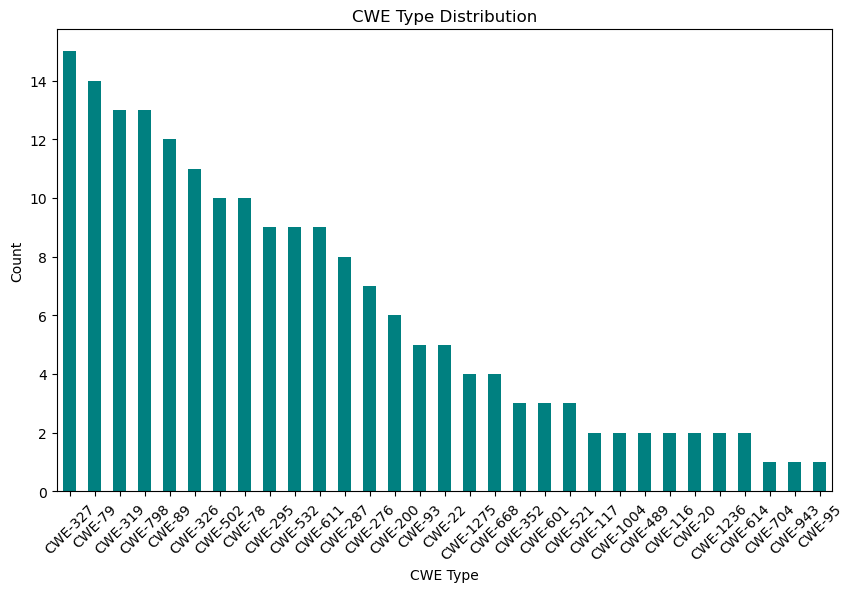

Affected Code Location Distribution:
Location
54-55    5
25-26    3
13-14    3
24-25    2
66-68    2
92-93    2
66-67    2
70-71    2
20-21    2
54-56    2
Name: count, dtype: int64


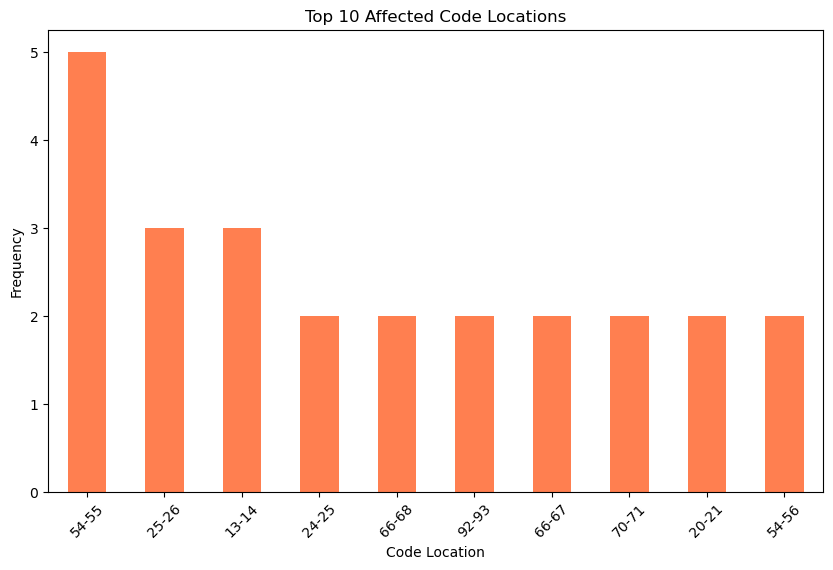

In [4]:
# Extract vulnerability information from the messages
import re

# Define a function to extract vulnerability information
def extract_vulnerability_info(content):
    """
    Extract CWE types, descriptions, and affected code locations from the message content.
    Returns a dictionary with the extracted information.
    """
    cwe_pattern = r"CWE-\d+"  # Pattern to match CWE types
    location_pattern = r"Location: lines (\d+-\d+)"  # Pattern to match code locations
    description_pattern = r"Description: (.+?)(?=Original Code:|$)"  # Pattern to match descriptions

    cwe_match = re.search(cwe_pattern, content)
    location_match = re.search(location_pattern, content)
    description_match = re.search(description_pattern, content)

    return {
        "CWE": cwe_match.group(0) if cwe_match else None,
        "Location": location_match.group(1) if location_match else None,
        "Description": description_match.group(1).strip() if description_match else None,
    }

# Apply the extraction function to the 'content' column
messages_df['vulnerability_info'] = messages_df['content'].apply(extract_vulnerability_info)

# Create a new DataFrame with structured vulnerability information
vulnerability_df = pd.DataFrame(messages_df['vulnerability_info'].tolist())

# Display the first few rows of the structured vulnerability information
print("Extracted Vulnerability Information:")
print(vulnerability_df.head())

# Analyze the distribution of CWE types
cwe_distribution = vulnerability_df['CWE'].value_counts()
print("CWE Type Distribution:")
print(cwe_distribution)

# Plot the distribution of CWE types
plt.figure(figsize=(10, 6))
cwe_distribution.plot(kind='bar', color='teal')
plt.title("CWE Type Distribution")
plt.xlabel("CWE Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Analyze the frequency of affected code locations
location_distribution = vulnerability_df['Location'].value_counts()
print("Affected Code Location Distribution:")
print(location_distribution.head(10))  # Display top 10 locations

# Plot the frequency of affected code locations
plt.figure(figsize=(10, 6))
location_distribution.head(10).plot(kind='bar', color='coral')
plt.title("Top 10 Affected Code Locations")
plt.xlabel("Code Location")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Analyze Code Samples
Extract original and fixed code samples from the messages. Implement functions to separate and clean code snippets from conversation text.

Extracted Code Samples:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

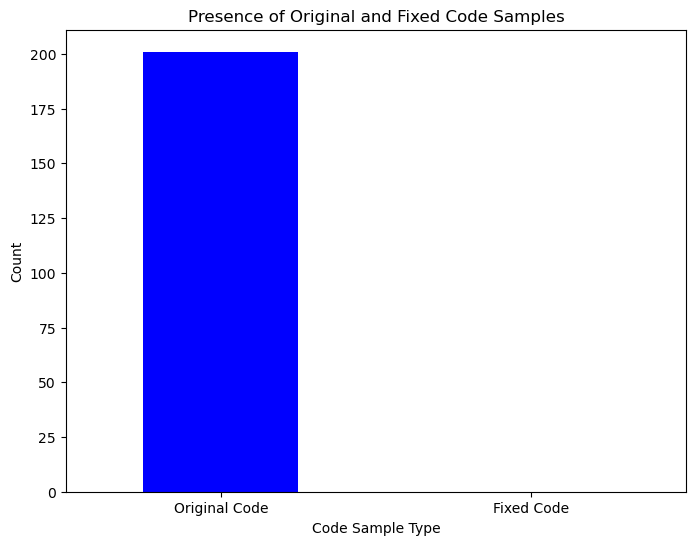

In [5]:
# Define a function to extract original and fixed code samples from the message content
def extract_code_samples(content):
    """
    Extract original and fixed code samples from the message content.
    Returns a dictionary with the extracted code samples.
    """
    original_code_pattern = r"Original Code:(.*?)(?=Task:|$)"  # Pattern to match original code
    fixed_code_pattern = r"Task:.*?Provide only the complete fixed code.*?:(.*?)(?=Original Code:|$)"  # Pattern to match fixed code

    original_code_match = re.search(original_code_pattern, content, re.DOTALL)
    fixed_code_match = re.search(fixed_code_pattern, content, re.DOTALL)

    return {
        "Original Code": original_code_match.group(1).strip() if original_code_match else None,
        "Fixed Code": fixed_code_match.group(1).strip() if fixed_code_match else None,
    }

# Apply the extraction function to the 'content' column
messages_df['code_samples'] = messages_df['content'].apply(extract_code_samples)

# Create a new DataFrame with structured code samples
code_samples_df = pd.DataFrame(messages_df['code_samples'].tolist())

# Display the first few rows of the structured code samples
print("Extracted Code Samples:")
print(code_samples_df.head())

# Analyze the presence of original and fixed code samples
code_sample_presence = code_samples_df.notnull().sum()
print("Presence of Original and Fixed Code Samples:")
print(code_sample_presence)

# Plot the presence of original and fixed code samples
plt.figure(figsize=(8, 6))
code_sample_presence.plot(kind='bar', color=['blue', 'green'])
plt.title("Presence of Original and Fixed Code Samples")
plt.xlabel("Code Sample Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Extract Code Patterns
Identify patterns in vulnerable code vs. fixed code using regex or AST parsing. Extract functions, variables, and code structures that might be relevant for static analysis.

In [6]:
import ast

# Define a function to extract code patterns using AST parsing
def extract_code_patterns(code):
    """
    Extract functions, variables, and code structures from the given code using AST parsing.
    Returns a dictionary with the extracted patterns.
    """
    try:
        tree = ast.parse(code)
        functions = [node.name for node in ast.walk(tree) if isinstance(node, ast.FunctionDef)]
        variables = [node.id for node in ast.walk(tree) if isinstance(node, ast.Name)]
        return {
            "Functions": functions,
            "Variables": variables,
        }
    except Exception as e:
        return {
            "Functions": None,
            "Variables": None,
            "Error": str(e),
        }

# Apply the function to extract patterns from original and fixed code samples
code_samples_df['original_code_patterns'] = code_samples_df['Original Code'].apply(
    lambda x: extract_code_patterns(x) if x else None
)
code_samples_df['fixed_code_patterns'] = code_samples_df['Fixed Code'].apply(
    lambda x: extract_code_patterns(x) if x else None
)

# Create separate DataFrames for original and fixed code patterns
original_patterns_df = pd.DataFrame(code_samples_df['original_code_patterns'].dropna().tolist())
fixed_patterns_df = pd.DataFrame(code_samples_df['fixed_code_patterns'].dropna().tolist())

# Display the first few rows of extracted patterns
print("Extracted Patterns from Original Code:")
print(original_patterns_df.head())

print("Extracted Patterns from Fixed Code:")
print(fixed_patterns_df.head())

# Analyze the frequency of functions and variables in original and fixed code
original_function_counts = original_patterns_df['Functions'].explode().value_counts()
fixed_function_counts = fixed_patterns_df['Functions'].explode().value_counts()

original_variable_counts = original_patterns_df['Variables'].explode().value_counts()
fixed_variable_counts = fixed_patterns_df['Variables'].explode().value_counts()

# Plot the top 10 functions in original and fixed code
plt.figure(figsize=(12, 6))
original_function_counts.head(10).plot(kind='bar', color='red', alpha=0.7, label='Original Code')
fixed_function_counts.head(10).plot(kind='bar', color='green', alpha=0.7, label='Fixed Code')
plt.title("Top 10 Functions in Original vs. Fixed Code")
plt.xlabel("Function Name")
plt.ylabel("Frequency")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot the top 10 variables in original and fixed code
plt.figure(figsize=(12, 6))
original_variable_counts.head(10).plot(kind='bar', color='blue', alpha=0.7, label='Original Code')
fixed_variable_counts.head(10).plot(kind='bar', color='orange', alpha=0.7, label='Fixed Code')
plt.title("Top 10 Variables in Original vs. Fixed Code")
plt.xlabel("Variable Name")
plt.ylabel("Frequency")
plt.legend()
plt.xticks(rotation=45)
plt.show()

Extracted Patterns from Original Code:
                                                                                                                                      Functions                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

KeyError: 'Functions'

# Feature Engineering for Static Analysis
Create features from the extracted code patterns and vulnerability information that can be used for building a static analysis model.

In [7]:
# Create features for static analysis model

# Combine extracted vulnerability information and code patterns into a single DataFrame
features_df = pd.concat([vulnerability_df, original_patterns_df.add_prefix('Original_'), fixed_patterns_df.add_prefix('Fixed_')], axis=1)

# Fill missing values with default values
features_df.fillna({'CWE': 'Unknown', 'Location': 'Unknown', 'Description': 'None'}, inplace=True)

# Add a feature for the number of functions in original and fixed code
features_df['Original_Function_Count'] = features_df['Original_Functions'].apply(lambda x: len(x) if isinstance(x, list) else 0)
features_df['Fixed_Function_Count'] = features_df['Fixed_Functions'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Add a feature for the number of variables in original and fixed code
features_df['Original_Variable_Count'] = features_df['Original_Variables'].apply(lambda x: len(x) if isinstance(x, list) else 0)
features_df['Fixed_Variable_Count'] = features_df['Fixed_Variables'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Add a feature for the change in function count between original and fixed code
features_df['Function_Count_Change'] = features_df['Fixed_Function_Count'] - features_df['Original_Function_Count']

# Add a feature for the change in variable count between original and fixed code
features_df['Variable_Count_Change'] = features_df['Fixed_Variable_Count'] - features_df['Original_Variable_Count']

# Add a feature for the length of the vulnerability description
features_df['Description_Length'] = features_df['Description'].apply(len)

# Display the first few rows of the feature DataFrame
print("Feature DataFrame:")
print(features_df.head())

# Analyze the correlation between features
correlation_matrix = features_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Feature Correlation Matrix")
plt.show()

# Save the feature DataFrame to a CSV file for further use
features_df.to_csv("static_analysis_features.csv", index=False)

KeyError: 'Fixed_Functions'

# Visualize Key Insights
Create visualizations to understand the distribution of vulnerability types, code changes, and other relevant patterns in the dataset.

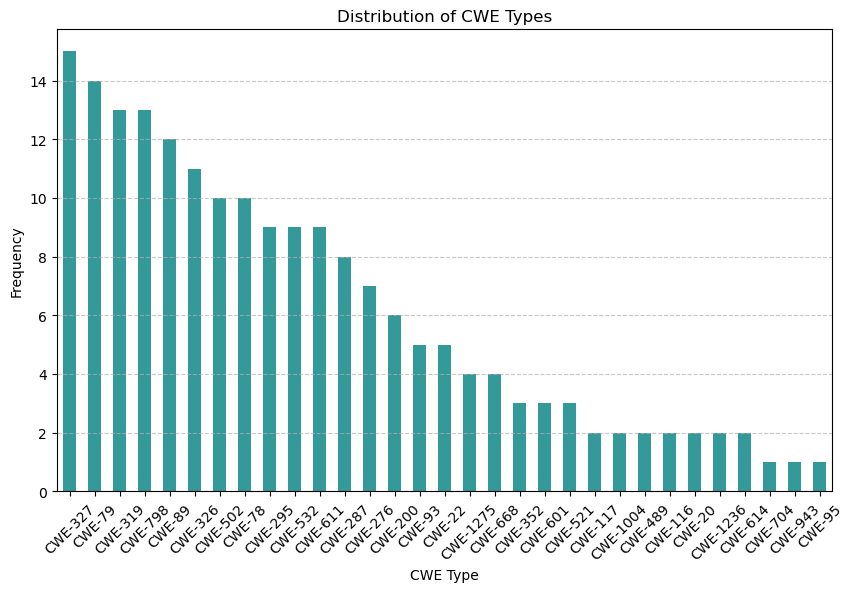

NameError: name 'features_df' is not defined

<Figure size 1000x600 with 0 Axes>

In [9]:
# Visualize Key Insights

# Visualize the distribution of CWE types
plt.figure(figsize=(10, 6))
cwe_distribution.plot(kind='bar', color='teal', alpha=0.8)
plt.title("Distribution of CWE Types")
plt.xlabel("CWE Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize the change in function count between original and fixed code
plt.figure(figsize=(10, 6))
features_df['Function_Count_Change'].hist(bins=20, color='blue', alpha=0.7)
plt.title("Change in Function Count (Original vs. Fixed Code)")
plt.xlabel("Change in Function Count")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize the change in variable count between original and fixed code
plt.figure(figsize=(10, 6))
features_df['Variable_Count_Change'].hist(bins=20, color='orange', alpha=0.7)
plt.title("Change in Variable Count (Original vs. Fixed Code)")
plt.xlabel("Change in Variable Count")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize the length of vulnerability descriptions
plt.figure(figsize=(10, 6))
features_df['Description_Length'].hist(bins=30, color='purple', alpha=0.7)
plt.title("Distribution of Vulnerability Description Lengths")
plt.xlabel("Description Length")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize the top 10 most frequent CWE types
plt.figure(figsize=(10, 6))
cwe_distribution.head(10).plot(kind='bar', color='green', alpha=0.8)
plt.title("Top 10 Most Frequent CWE Types")
plt.xlabel("CWE Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize the correlation matrix as a heatmap
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Prepare Data for Model Training
Transform the processed data into a format suitable for training a static analysis model. Split the data into training, validation, and test sets.

In [10]:
# Prepare Data for Model Training

from sklearn.model_selection import train_test_split

# Define the target variable and features
# Assuming 'CWE' is the target variable for the static analysis model
X = features_df.drop(columns=['CWE'])
y = features_df['CWE']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# Save the datasets to CSV files for further use
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
X_val.to_csv("X_val.csv", index=False)
y_val.to_csv("y_val.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

NameError: name 'features_df' is not defined